# The Game of Life

An implementation of John Conway's Game of Life. UNH Tech 411.05, *Patterns and Symmetry*, John F. Gibson, 2024-11-01

For a decription of the game and details of the algorithm, please refer to 
Martin Gardner's Mathematical Games column,
["The fantastic combinations of John Conway's new solitaire game 'life'"](https://mycourses.unh.edu/courses/129030/files/12498842), 
Martin Gardner's Mathematical Games column, Scientific American, Oct. 1970. 


## The update rule

This function takes a matrix of ones and zeros and returns the board that follows according
to the Game of Life update rule. 

In [1]:
"""
nextboard = update(board)

Update board of cells according to Game of Life rules. The rules are 
   * a live cell lives if it has 2 or 3 live neighbors and dies otherwise
   * a dead cell comes to life if has 3 live neighbors and stays dead otherwise
The input `board` is a matrix of 1s and 0s. 
"""
function update(board)
    M,N = size(board)
    nextboard = fill(0, M, N)   # start next board as all 0

    for i in 1:M
        inbrs = nbrindices(i,M) # get row indices of nbrs
        
        for j in 1:N
            jnbrs = nbrindices(j,N) # get column indices of nbrs
            
            living = board[i,j] ≠ 0 ? true : false  # is cell i,j alive? 
            
            livenbrs = reduce(+, board[inbrs, jnbrs]) - board[i,j] # count the number of live nbrs
 
            # if cell is alive and has 2 or 3 live neighbors, or dead with 3 brs, set it to living.
            if (living && (livenbrs == 2 || livenbrs == 3)) ||  (!living && livenbrs == 3)
                nextboard[i,j] = 1
            end
        end   
    end
    nextboard
end

"""
nbrindices(i,N) : return indices of neighboring cells on a periodic grid of N cells 1,...,N
  
The return values are 
   [i-1; i; i+1] for 1 < i < N,
   [N;   i; i+i] for i == 1, or
   [i-1; i; 1]   for i == N.
"""
function nbrindices(i, N) 
    if i == 1
        return [N; i; i+1]
    elseif i == N
        return [i-1; i; 1]
    else
        return [i-1; i; i+1]
    end
end

nbrindices

## Plotting functions

In [2]:
using Plots

# define some color schemes 
orangeblue = cgrad([:orange, :blue])
blueorange = cgrad([:blue, :orange])
grayorange = cgrad([:gray94, :orange])
grayblue = cgrad([:gray94, :steelblue3])
graygreen = cgrad([:gray94, :mediumseagreen])

"""
plot a board for the Game of Life, a single frame of an animation
""" 
function plotboard(X; color=:blue, title="", markersize=0)
    k = findall(x->x==1, X)
    I = [k[n][1] for n in 1:length(k)]
    J = [k[n][2] for n in 1:length(k)]
    markersize = (markersize == 0) ? 128÷max(size(board)...) : markersize
    scatter(J, I, markersize=markersize, color=color, yaxis=:flip, title=title, label="")
    plot!(aspect_ratio=1, xlim=(0,size(X,1)+1), ylim=(0,size(X,2)+1))
end

"""
animate a board for the Game of Life
"""
function animateboard(board; t=32, speed=1, color=:blue, markersize=0)
    X = board
    for t in 0:t
        p = plotboard(X, title="t=$t", color=color, markersize=markersize)
        IJulia.clear_output(true)
        display(p)
        sleep(1.0/(3*speed))
        X = update(X)
    end
end

animateboard

## Board set-up functions

In [3]:
"""
newboard(M,N) : initiate an M x N board of zeros (dead cells)
"""
newboard(M,N) = fill(0,M,N)

"""
addseed!(board, seed, i, j) : place some initial pattern `seed` on the board, at position i,j
"""
function addseed!(board, seed, i, j)
    m,n = size(seed)
    board[i:i+m-1, j:j+n-1] += seed  # no
    board
end

# some sample seeds. Look in Scientific American article for others, or experiment
glider = 
[0 1 0;
 0 0 1;
 1 1 1]

blinker =
[1 1 1]

rpentomino = 
[0 1 1;
 1 1 0;
 0 1 0]

3×3 Matrix{Int64}:
 0  1  1
 1  1  0
 0  1  0

## Example usage

In [4]:
# initiate a 16 x 16 board with a glider and a blinker

board = newboard(16,16)
addseed!(board, glider, 3,3)
addseed!(board, blinker, 12, 4)

16×16 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

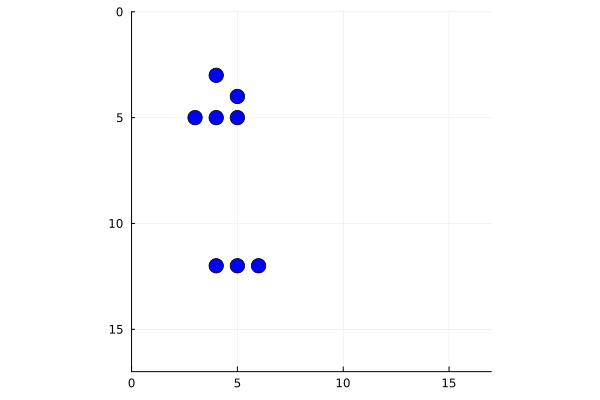

In [5]:
# show the same board with the plotboard() function

plotboard(board)

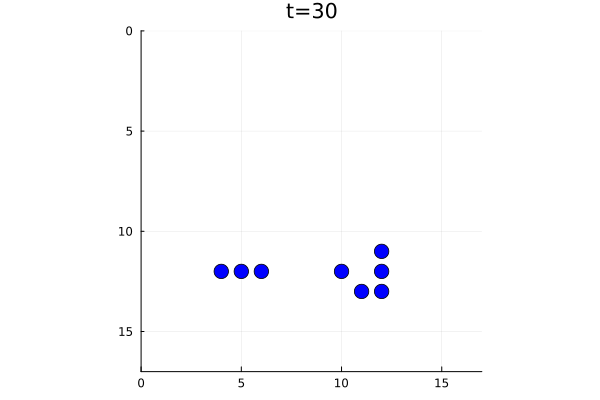

In [6]:
# make an animation from the above starting position

animateboard(board, t=30, speed=2)

## The R pentomino

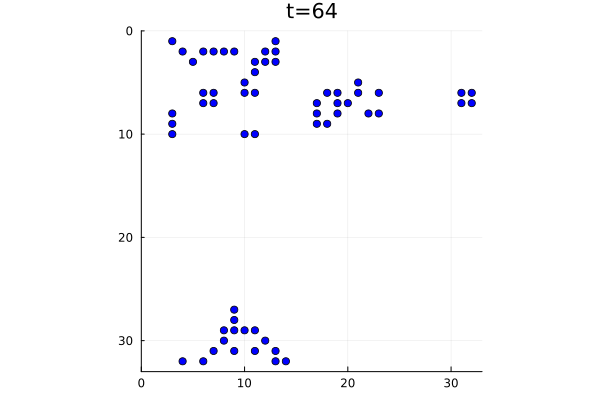

In [7]:
rpentomino = 
[0 1 1;
 1 1 0;
 0 1 0]

board = newboard(32,32)
addseed!(board, rpentomino, 7,7)
animateboard(board, t=64, speed=4)